In [83]:
#import the required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [84]:
#load the data set
df=pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df.dropna(inplace=True)

In [85]:
#dataset description
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [86]:
df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

** We will select India as our major focus and proceed to do data analysis on it**

In [87]:
Indian_data=df[df['Country']=='India']

In [88]:
Indian_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2508 entries, 243695 to 246306
Data columns (total 4 columns):
dt                               2508 non-null object
AverageTemperature               2508 non-null float64
AverageTemperatureUncertainty    2508 non-null float64
Country                          2508 non-null object
dtypes: float64(2), object(2)
memory usage: 98.0+ KB


In [89]:
Indian_data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,2508.000000,2508.000000
mean,23.873789,0.758323
std,4.325811,0.763401
min,14.385000,0.067000
25%,19.857750,0.224000
50%,25.018500,0.366000
75%,27.132750,1.209000
max,31.329000,6.089000


In [90]:
Indian_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
243695,1796-01-01,17.044,2.044,India
243696,1796-02-01,19.193,1.359,India
243697,1796-03-01,22.319,2.125,India
243698,1796-04-01,27.233,1.510,India
243699,1796-05-01,30.035,1.338,India


In [91]:
Indian_data=Indian_data.reset_index()
Indian_data.drop(['Country','index'],axis=1,inplace=True)

In [92]:
split_year=lambda x : x[0:4]
split_month=lambda x : x[5:7]

In [93]:
Indian_data['year']=Indian_data['dt'].apply(split_year).astype(int)
Indian_data['month']=Indian_data['dt'].apply(split_month).astype(int)
Indian_data.drop('dt',inplace=True,axis=1)


In [94]:
Temperature_per_year=Indian_data.groupby(['year']).mean()

In [95]:
Temperature_per_year.drop(['month'],axis=1)
Temperature_per_year.reset_index(inplace=True)

In [96]:
Temperature_per_year.head()

,year,AverageTemperature,AverageTemperatureUncertainty,month
0,1796,23.675250,2.294417,6.5
1,1797,24.839900,2.145600,7.5
2,1798,23.273300,2.170500,6.9
3,1799,23.949417,1.916417,6.5
4,1800,23.911917,1.961167,6.5


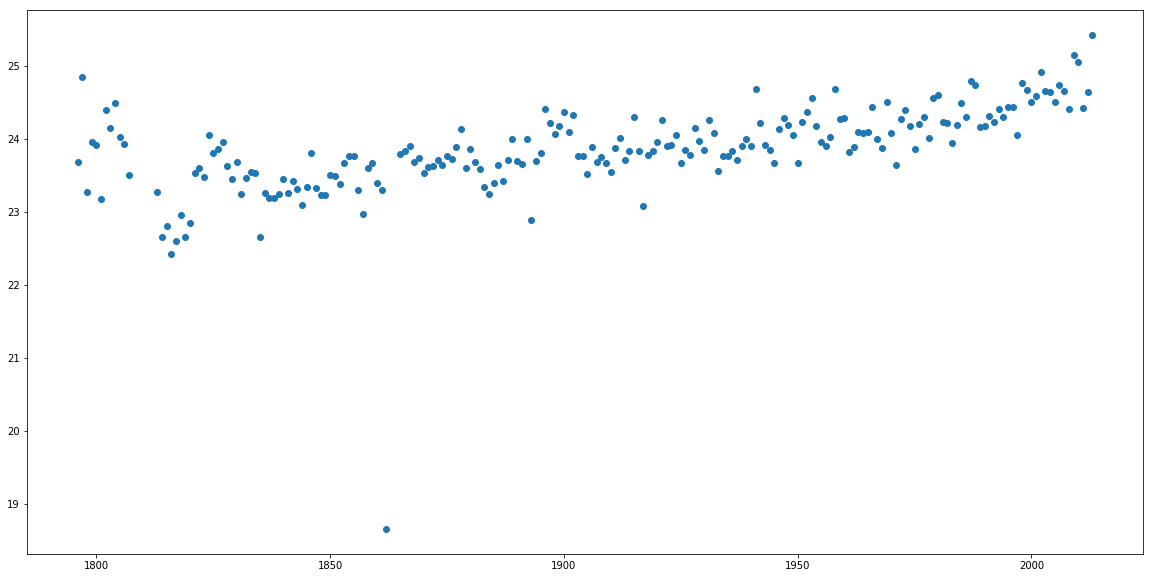

In [97]:
plt.figure(figsize=(20,10))
plt.scatter(x=Temperature_per_year['year'],y=Temperature_per_year['AverageTemperature'])

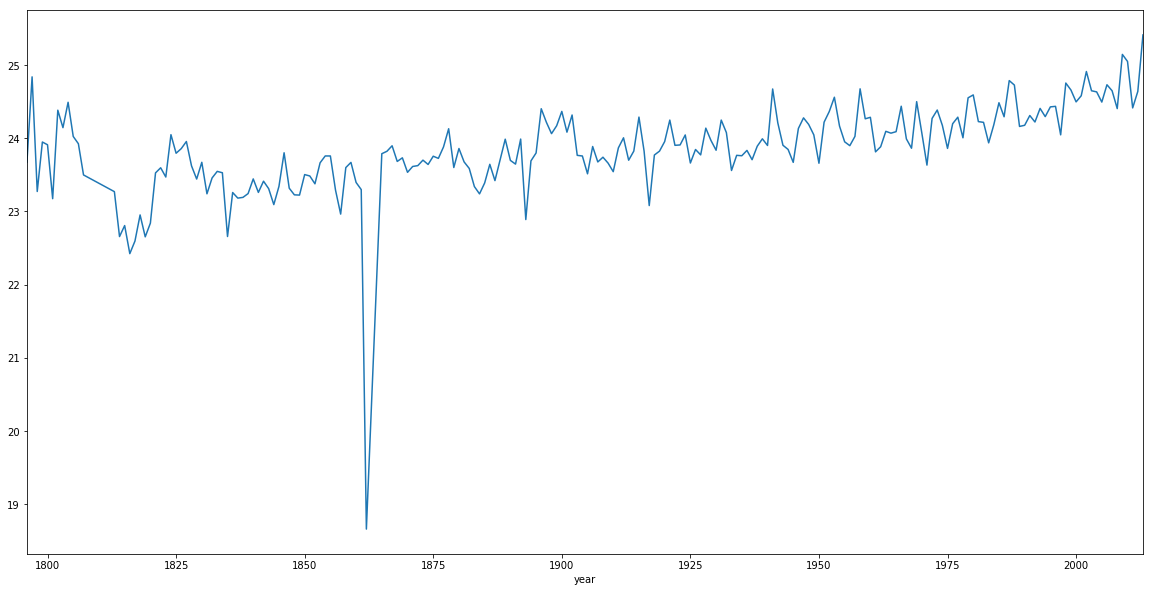

In [98]:
plt.figure(figsize=(20,10))
sns.tsplot(data=Temperature_per_year['AverageTemperature'],time=Temperature_per_year['year'])

In [99]:
Year_2000s=Temperature_per_year[Temperature_per_year['year']>=2000]

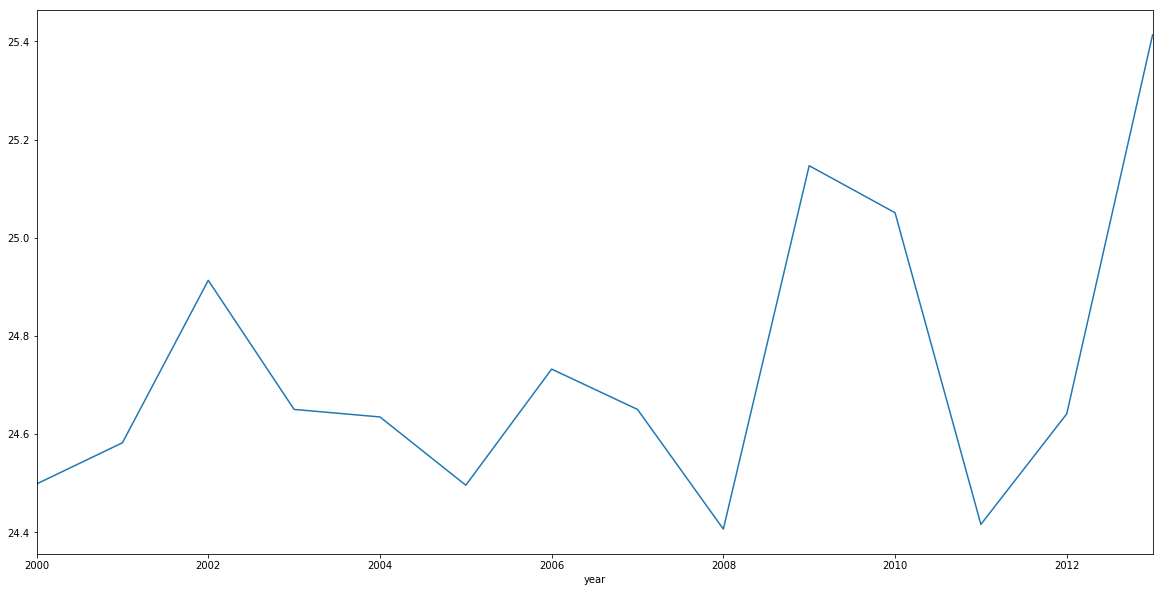

In [100]:
plt.figure(figsize=(20,10))
sns.tsplot(data=Year_2010['AverageTemperature'],time=Year_2010['year'])